In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import caffe

In [3]:
import cv2

In [4]:
net = caffe.Net('/Users/danilonunes/workspace/caffe-model/deploy.prototxt', 
                '/Users/danilonunes/workspace/caffe-model/snapshot_iter_612.caffemodel', 
                caffe.TEST)

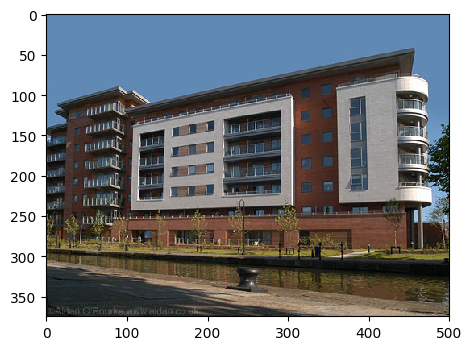

In [6]:
image = cv2.imread('../data/images/a_apartment_building_apartment_building_000651.jpg')
plt.imshow(image[:, :, (2, 1, 0)])

In [51]:
import scipy
with open('/Users/danilonunes/workspace/caffe-model/mean.binaryproto', 'rb') as f:
    blob = caffe.proto.caffe_pb2.BlobProto()
    blob.MergeFromString(f.read())
    mean_image = np.reshape(blob.data, (3, 384, 384))
    data_shape = tuple((1, 3, 224, 224))
    assert len(data_shape) == 4, 'Bad data shape.'
    mean_image = mean_image.astype(np.uint8)
#     mean_image = mean_image.transpose(1, 2, 0)
    shape = list(mean_image.shape)
    mean_image = scipy.misc.imresize(mean_image, (data_shape[2], data_shape[3]))
    mean_image = mean_image.transpose(2, 0, 1)
    mean_image = mean_image.astype('float')

In [52]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2, 0, 1))  # move image channels to outermost dimension  
transformer.set_channel_swap('data', (2, 1, 0))
transformer.set_mean('data', mean_image)

In [53]:
transformed_image = transformer.preprocess('data', image[:, :, (2, 1, 0)])

In [54]:
net.blobs['data'].data[...] = transformed_image

In [55]:
output = net.forward()

In [56]:
labels = ['indoor', 'outdoor']
print("{} {:.4f}%".format(labels[output['softmax'][0].argmax(axis=0)], 100 * output['softmax'][0].max(axis=0)))

outdoor 95.5328%


In [18]:
!ls /Users/danilonunes/workspace/caffe-model/

deploy.prototxt              original.prototxt
info.json                    snapshot_iter_612.caffemodel
labels.txt                   solver.prototxt
mean.binaryproto             train_val.prototxt
